In [89]:
import pandas as pd
from pandas import read_parquet
from datetime import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import contextily as cx

In [91]:
feb=read_parquet(r"yellow_tripdata_2009-02.parquet")
june=read_parquet("yellow_tripdata_2009-06.parquet")
oct=read_parquet("yellow_tripdata_2009-10.parquet")

ArrowMemoryError: malloc of size 2097152 failed

In [ ]:
feb.drop(feb[(feb['Start_Lon'] <-75) |(feb['Start_Lon'] > -71)].index,axis=0, inplace=True)
feb.drop(feb[(feb['End_Lon'] <-75) | (feb['End_Lon'] > -71)].index,axis=0, inplace=True)
feb.drop(feb[(feb['Start_Lat'] <40) | (feb['Start_Lat'] >42)].index,axis=0, inplace=True)
feb.drop(feb[(feb['End_Lat'] <40) | (feb['End_Lat'] > 42)].index,axis=0, inplace=True)

In [ ]:
june.drop(june[(june['Start_Lon'] <-75) |(june['Start_Lon'] > -71)].index,axis=0, inplace=True)
june.drop(june[(june['End_Lon'] <-75) | (june['End_Lon'] > -71)].index,axis=0, inplace=True)
june.drop(june[(june['Start_Lat'] <40) | (june['Start_Lat'] >42)].index,axis=0, inplace=True)
june.drop(june[(june['End_Lat'] <40) | (june['End_Lat'] > 42)].index,axis=0, inplace=True)

In [ ]:
oct.drop(oct[(oct['Start_Lon'] <-75) |(oct['Start_Lon'] > -71)].index,axis=0, inplace=True)
oct.drop(oct[(oct['End_Lon'] <-75) | (oct['End_Lon'] > -71)].index,axis=0, inplace=True)
oct.drop(oct[(oct['Start_Lat'] <40) | (oct['Start_Lat'] >42)].index,axis=0, inplace=True)
oct.drop(oct[(oct['End_Lat'] <40) | (oct['End_Lat'] > 42)].index,axis=0, inplace=True)

In [ ]:
all=pd.concat([feb,june,oct]) 

KeyboardInterrupt: 

In [ ]:
geometry = [Point(xy)for xy in zip(feb['Start_Lon'],feb['Start_Lat'])]
gdf = GeoDataFrame(feb,geometry = geometry)

In [ ]:
position={'Staten_Island': 816,
 'Bronx': 11756,
 'Manhattan': 12355795,
 'Brooklyn': 213160,
 'Queens': 523766}

In [ ]:
from fiona import supported_drivers
supported_drivers['KML'] = 'rw'
polys = gpd.read_file(r'C:\Users\ginny\OneDrive\桌面\Big Data hw1\Borough Boundaries.kml', driver='KML')

In [ ]:
polys.Name=["Staten_Island","Bronx","Manhattan","Brooklyn","Queens"]
polys["pickup_count"]=[816,11756,12355795,213160,523766]

In [ ]:
polys

,Name,Description,geometry,pickup_count
0,Staten_Island,,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",816
1,Bronx,,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",11756
2,Manhattan,,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",12355795
3,Brooklyn,,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",213160
4,Queens,,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",523766


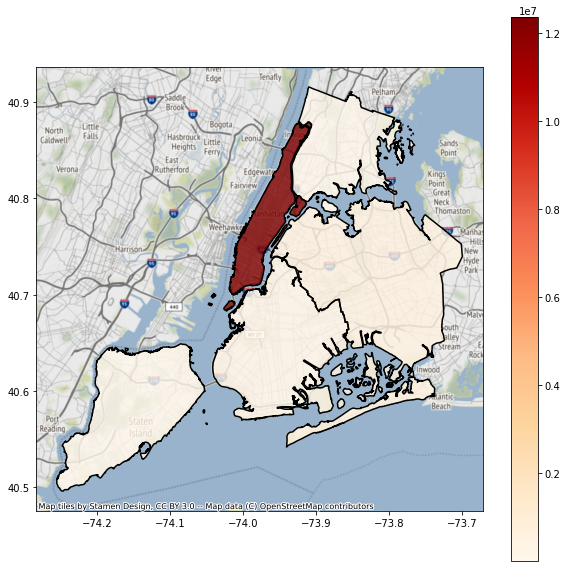

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('nybb'))
world=world.to_crs(epsg=4326)
ax = world.boundary.plot(figsize=(10, 10), edgecolor='k')
cx.add_basemap(ax,crs=world.crs)
polys.plot(column='pickup_count', ax=ax, legend=True,cmap='OrRd',alpha=0.8)


plt.show()

In [ ]:
geometry = [Point(xy)for xy in zip(all['Start_Lon'],all['Start_Lat'])]
gdf = GeoDataFrame(feb,geometry = geometry)
world = gpd.read_file(gpd.datasets.get_path('nybb'))
world=world.to_crs(epsg=4326)
ax = world.boundary.plot(figsize=(10, 10), edgecolor='k')

gdf.plot(ax=ax,color='r',markersize=0.001)
cx.add_basemap(ax,crs=world.crs)
plt.xlim([-74.3,-73.6])
plt.ylim([40.4,41])
plt.show()
#plt.tight_layout()

KeyboardInterrupt: 

In [ ]:
geometry = [Point(xy)for xy in zip(all['End_Lon'],all['End_Lat'])]
gdf = GeoDataFrame(feb,geometry = geometry)
world = gpd.read_file(gpd.datasets.get_path('nybb'))
world=world.to_crs(epsg=4326)
ax = world.boundary.plot(figsize=(10, 10), edgecolor='k')

gdf.plot(ax=ax,color='b',markersize=0.1,alpha=0.5)
cx.add_basemap(ax,crs=world.crs)
plt.xlim([-74.3,-73.7])
plt.ylim([40.4,41])
plt.show()

MemoryError: 

In [ ]:
import winsound
winsound.Beep(500,800)